In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
#FR: © EuroGeographics pour les limites administratives
#https://ec.europa.eu/eurostat/web/gisco/geodata/administrative-units/communes

In [63]:
senateurs = pd.read_csv("C:/Users/sylva/OneDrive/Bureau/senat/Data/senateur_for_map.csv")

In [3]:
pd.options.plotting.backend='plotly'

In [4]:
data_dir = "C:/Users/sylva/OneDrive/Bureau/senat/eurostat/"
path_rg = data_dir + "COMM_RG_01M_2016_4326.geojson"
gdf_rg = gpd.read_file(path_rg)
#path_bn = data_dir + "COMM_BN_01M_2016_4326.geojson"
#gdf_bn = gpd.read_file(path_bn)
path_lb = data_dir + "COMM_LB_2016_4326.geojson"
gdf_lb = gpd.read_file(path_lb)



In [5]:
data_dir_country = data_dir + "country/"
path_country = data_dir_country + "CNTR_BN_20M_2020_4326_COASTL.geojson"
gdf_country = gpd.read_file(path_country)

In [6]:
name_replace = {"Brussel#Bruxelles": 'Bruxelles'}

In [7]:
gdf_lb["NAME_ASCI"] = gdf_lb["NAME_ASCI"].replace(name_replace)

In [8]:
gdf_lb = gdf_lb.set_index("NAME_ASCI")

In [9]:
paris = gdf_lb[gdf_lb.index=="Paris 1er Arrondissement"]

In [10]:
gdf_lb["distance"] = gdf_lb["geometry"].distance(paris["geometry"][0])

C:\Users\sylva\anaconda3\envs\senateur\Lib\site-packages\geopandas\geoseries.py:648: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)
C:\Users\sylva\AppData\Local\Temp\ipykernel_14660\2340235212.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_lb["distance"] = gdf_lb["geometry"].distance(paris["geometry"][0])


In [11]:
years = list(range(1789, 1816))

In [ ]:
lieux_annee = [lieu for lieu in senateurs["nom_local1799"]]
lieux_annee

In [ ]:
'Chamonix' in list(gdf_lb.index)

In [ ]:
import difflib
difflib.get_close_matches('Chamonix-Mont-Blanc', gdf_lb.index)

In [ ]:
difflib.get_close_matches('Siegburg', gdf_lb.index)

In [ ]:
for string in list(gdf_lb.index):
    if string.startswith('Brussel'):
        print(string)

In [15]:
tous_lieux = []
for annee in years:
    lieux_annee = [lieu for lieu in senateurs["nom_local"+str(annee)]]
    tous_lieux = tous_lieux + lieux_annee
tous_lieux = set(tous_lieux)
print(tous_lieux)
lieux_inconnus = [lieu for lieu in tous_lieux if lieu not in gdf_lb.index]
print(lieux_inconnus)

{'Brest ', 'Nantes', 'Etats-Unis', 'Montmorency', 'Besancon', 'Namur', 'Belgique', 'Anvers Belgique', 'Douai', 'Valmy', 'Suisse Puis Angleterre', 'Chambly (Oise)', 'Cambrai', 'Savona', 'Antwerpen', 'Pyrénées Orientales', 'Berlin', 'Bruxelles', 'Fontainebleau', 'Meaux', 'Chamonix-Mont-Blanc', 'Moselle Rhin', 'Amsterdam', 'Aix-en-Provence', 'Lyon', 'Lille', 'Napoli', 'Dijon', 'Hohenlinden', 'Parma', 'Loir Et Cher', 'Ljubljana', 'Sur Le Mein', 'Ile Et Vilaine', 'Toulouse', 'Côtes Océan', 'Montech', 'Jemmapes', 'Frontière Espagne', 'Madrid', 'Roma', 'Toulon', 'Blois', 'Montpellier', 'Valenciennes Condé Landrecies Le Quesnoy', 'Siegburg', 'Armée Du Nord', 'Troyes', 'Perpignan', 'Ettenheim', 'Barcelone', 'Paris', 'Soissons', 'Trèves Mayence', 'Campagnes Etrangeres', 'Marengo', 'France'}
['Brest ', 'Etats-Unis', 'Belgique', 'Anvers Belgique', 'Suisse Puis Angleterre', 'Chambly (Oise)', 'Pyrénées Orientales', 'Moselle Rhin', 'Loir Et Cher', 'Sur Le Mein', 'Ile Et Vilaine', 'Côtes Océan', 'Jemm

In [13]:
senateurs

,Unnamed: 0,nom_local1789,nom_local1790,nom_local1791,nom_local1792,nom_local1793,nom_local1794,nom_local1795,nom_local1796,nom_local1797,...,nom_local1807,nom_local1808,nom_local1809,nom_local1810,nom_local1811,nom_local1812,nom_local1813,nom_local1814,nom_local1815,position_sociale
0,0,Paris,Herault,Paris,Paris,Paris,Paris,Paris,Paris,Paris,...,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,droit
1,1,Paris,Paris,Paris,Valmy,Armée Du Nord,Trèves Mayence,Toulon,Paris,Siegberg,...,Paris,Paris,Antwerpen,Paris,Paris,Paris,Paris,Paris,Paris,négoce
2,2,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,...,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,droit
3,3,Paris,Paris,Paris,Jemmapes,Paris,Sambre Et Mesuse,Sur Le Mein,Paris,Paris,...,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,noblesse
4,4,Montech,Paris,Pyrenees-Orientales,Paris,Perpignan,Pyrénées Orientales,Paris,Madrid,Paris,...,Paris,Napoli,Paris,Paris,Paris,Paris,Paris,Paris,Paris,noblesse
5,5,Paris,Blois,Loir Et Cher,Paris,Mont-Blanc,Paris,Paris,Paris,Paris,...,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,artisan
6,6,Douai,Paris,Paris,Pyrenees-Orientales,Paris,Catalogne,Paris,Paris,Paris,...,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,droit
7,7,Paris,Paris,Paris,Etats-Unis,Paris,Paris,Paris,Paris,Paris,...,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,paysan
8,8,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,...,Paris,Roma,Paris,Paris,Paris,Paris,Paris,Paris,Paris,NaN
9,9,Paris,Paris,Paris,Valmy,Soissons,Valenciennes Condé Landrecies Le Quesnoy,Paris,Paris,Paris,...,Brest,Paris,Anvers Belgique,Paris,Paris,Paris,Paris,Paris,Paris,haute armée


In [22]:
for annee in years:
    senateurs["coord"+str(annee)]=pd.merge(gdf_lb, senateurs["nom_local"+str(1789)], 
                                           right_on="nom_local"+str(1789), left_index=True, 
                                           how = "right")["geometry"]

In [55]:
dic_annee={}
for annee in years:#senateurs[senateurs[str(annee)].notna() & 
    senateur_year = senateurs[senateurs["nom_local"+str(annee)]!="Paris"][["nom_local"+str(annee), "position_sociale", ]]
    dic_annee[annee]=pd.merge(gdf_lb, senateur_year, right_on="nom_local"+str(annee), left_index=True, how = "right")

In [18]:
dic_annee

{1789:             id     COMM_ID CNTR_ID        LAT       LON CNTR_CODE  \
 4   FR76822125  FR76822125      FR  43.952271  1.237694        FR   
 6   FR32593178  FR32593178      FR  50.376221  3.076812        FR   
 16    BE421004    BE421004      BE  50.897887  4.406258        BE   
 
             COMM_NAME TRUE_FLAG NSI_CODE             NAME_NSI  \
 4             Montech         T    82125              Montech   
 6               Douai         T    59178                Douai   
 16  Brussel#Bruxelles         T    21004  Bruxelles / Brussel   
 
             NAME_LATN NUTS_CODE         FID                  geometry  \
 4             Montech     FRJ28  FR76822125  POINT (1.23770 43.95230)   
 6               Douai     FRE11  FR32593178  POINT (3.07680 50.37620)   
 16  Brussel#Bruxelles     BE100    BE421004  POINT (4.40630 50.89790)   
 
     distance nom_local1789       position_sociale  
 4   5.031599       Montech               noblesse  
 6   1.685120         Douai               

In [23]:
gdf_lb["CNTR_CODE"].unique()

array(['FR', 'PT', 'IS', 'ES', 'IE', 'FO', 'UK', 'BE', 'AD', 'NL', 'NO',
       'CH', 'DE', 'IT', 'DK', 'LU', 'LI', 'AT', 'SI', 'CZ', 'MT', 'HR',
       'PL', 'SE', 'VA', 'HU', 'SK', 'RO', 'LT', 'LV', 'FI', 'MK', 'UA',
       'EL', 'BG', 'RS', 'AL', 'XK', 'EE', 'MD', 'CY', 'GL', 'GI', 'SM',
       'MC', 'FK', 'BL'], dtype=object)

In [24]:
#gdf_for_bounds[gdf_for_bounds["LAT"]==min(gdf_for_bounds["LAT"])]

In [25]:
gdf_for_bounds = gdf_lb[~gdf_lb["CNTR_CODE"].isin(["FR", "UA", "DK", "GL", "FK", "BL", "PT", "ES", "IS"])]
minx, miny, maxx, maxy = gdf_for_bounds.total_bounds

In [26]:
gdf_for_bounds[gdf_for_bounds["LON"]==min(gdf_for_bounds["LON"])]

,id,COMM_ID,CNTR_ID,LAT,LON,CNTR_CODE,COMM_NAME,TRUE_FLAG,NSI_CODE,NAME_NSI,NAME_LATN,NUTS_CODE,FID,geometry,distance
NAME_ASCI,,,,,,,,,,,,,,,
Dunquin#Dun Chaoin,IE2503077073,IE2503077073,IE,52.127769,-10.447733,IE,Dunquin#Dún Chaoin,T,19034,Dún Chaoin / Dunquin,Dunquin#Dun Chaoin,IE053,IE2503077073,POINT (-10.44770 52.12780),13.194425


In [27]:
#ax = gdf_rg.plot(figsize=(20,15), color="gray")
#dic_annee[1801].plot(figsize=(20,15), ax=ax, color="yellow")
#gdf_bn.plot(figsize=(20,15), ax=ax, color="red")

In [28]:
"""ax = gdf_country.plot(figsize=(20,15), color="gray")
dic_annee[1802].plot(figsize=(20,15), ax=ax, color="yellow")
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)"""

'ax = gdf_country.plot(figsize=(20,15), color="gray")\ndic_annee[1802].plot(figsize=(20,15), ax=ax, color="yellow")\nax.set_xlim(minx, maxx)\nax.set_ylim(miny, maxy)'

In [51]:
years_consulat = list(range(1799, 1805))
def plot_several_years(years):
    cols, rows = 2,int(len(years)/2+0.5)  #num of subplots <= (cols x rows)
    # create figure with array of axes
    fig, axs = plt.subplots(nrows=rows, ncols=cols)
    fig.set_size_inches(6, 10)  #set it big enough for all subplots
    
    count = 0
    for irow in range(axs.shape[0]):
        for icol in range(axs.shape[1]):
            #print(icol, irow)
            if count<len(years):
                # plot that country on current axes
                gdf_country.plot(figsize=(20,15), color="gray", ax=axs[irow][icol])
                dic_annee[years[count]].plot(figsize=(20,15), ax=axs[irow][icol], color="yellow", aspect = 1)
                #senateurs["geometry"] = senateurs["coord"+str(years[count])]#[["coord"+str(years[count]), "nom_local"+str(years[count])]]
                #senateurs.plot(figsize=(20,15), ax=axs[irow][icol], color="yellow", aspect = 1)
                axs[irow][icol].set_xlim(minx, maxx)
                axs[irow][icol].set_ylim(miny, maxy)
                #world[ world['iso_a3'] == years[count] ].plot(ax=axs[irow][icol])
                axs[irow][icol].set_title('année : '+str(years[count]))
                count +=1
            else:
                # hide extra axes
                axs[irow][icol].set_visible(False)
    #plt.savefig("C:/Users/sylva/OneDrive/Bureau/senat/plot/map_year")
    plt.show()

C:\Users\sylva\AppData\Local\Temp\ipykernel_14660\1554295370.py:15: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  dic_annee[years[count]].plot(figsize=(20,15), ax=axs[irow][icol], color="yellow", aspect = 1)


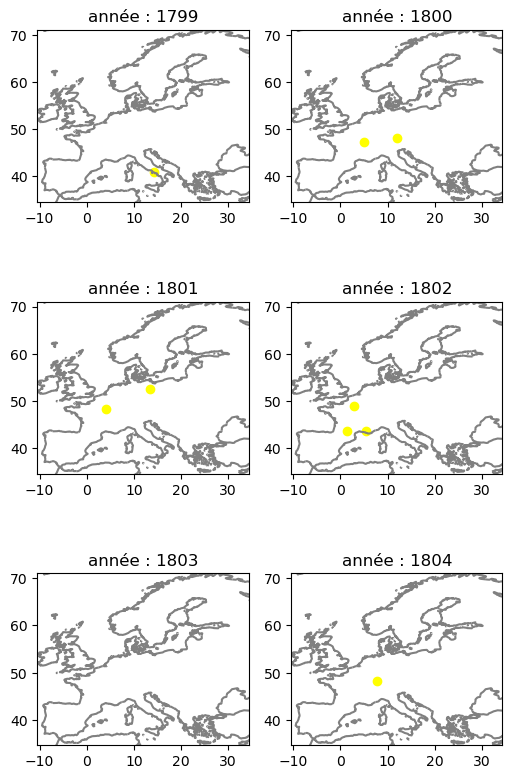

In [52]:
plot_several_years(years_consulat)

In [ ]:
years_empire = list(range(1805, 1816))
plot_several_years(years_empire)

In [ ]:
senateurs

In [ ]:
dic_annee[1804]

In [ ]:
dic_annee[years[1]]

In [ ]:
for annee in years:
    senateurs_en_exercice = senateurs

In [ ]:
#gdf_lb

In [61]:
senateurs.columns

Index(['Unnamed: 0', 'nom_local1789', 'nom_local1790', 'nom_local1791',
       'nom_local1792', 'nom_local1793', 'nom_local1794', 'nom_local1795',
       'nom_local1796', 'nom_local1797', 'nom_local1798', 'nom_local1799',
       'nom_local1800', 'nom_local1801', 'nom_local1802', 'nom_local1803',
       'nom_local1804', 'nom_local1805', 'nom_local1806', 'nom_local1807',
       'nom_local1808', 'nom_local1809', 'nom_local1810', 'nom_local1811',
       'nom_local1812', 'nom_local1813', 'nom_local1814', 'nom_local1815',
       'position_sociale', 'date nomin'],
      dtype='object')

In [ ]:
distance_moyenne_exercice = []
part_voyage_exercice = []
distance_moyenne_futur = []
part_voyage_futur = []
for annee in years:
    senateurs_en_exercice = senateurs[senateurs["date_nomin"]<=years]
    futurs_senateurs = senateurs[senateurs["date_nomin"]>years]
    liste_exercice = pd.merge(senateurs_en_exercice * dic_annee[annee], on = "nom", how = 'left')
    part_voyage_exercice.append(len(distance_moyenne_exercice)/len(senateurs_en_exercice))
    distance_moyenne_exercice.append(mean(liste_exercice))
    liste_futur = pd.merge(futurs_senateurs * dic_annee[annee], on = "nom", how = 'left')
    part_voyage_futur.append(len(distance_moyenne_futur)/len(futurs_senateurs))
    distance_moyenne_futur.append(mean(liste_futur))

In [ ]:
# Regarder les âges moyens à la nomination, la répartition des types... des nouveaux sénateurs par an

In [64]:
# régresser la distance sur le fait d'être nommé avec effet fixe individu ?

In [66]:
# proche d'un endroit où la personne était déjà allé auparavant ? 
#-> récupérer l'endroit précédent le plus proche, rapport de distance >90%